
![alt text](https://www.business.unsw.edu.au/style%20library/asb/assets/images/logo-unsw.png)
__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# <font color='red'>MARK5828 Advertising Analytics </font>
##**Week 1: Picture Ad Content Analysis   **




__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
# <font color='red'> Part 3: Linear Regression  </font>

![alt text](http://rasbt.github.io/mlxtend/user_guide/regressor/LinearRegression_files/simple_regression.png)

**<font color='green'> Linear regression </font> models are used to show or predict the relationship between two variables or factors. The factor that is being predicted (the factor that the equation solves for) is called the  <font color='green'> dependent variable (y) </font>. The factors that are used to predict the value of the dependent variable are called the  <font color='green'> independent variables (x) </font>.**

* **<font color='green'> Simple Linear Regression Analysis </font>: The simplest form of a regression analysis uses on dependent variable and one independent variable. In this simple model, a straight line approximates the relationship between the dependent variable and the independent variable.**
* **<font color='green'> Multiple Regression Analysis </font> : Analysis When two or more independent variables are used in regression analysis, the model is no longer a simple linear one.**


__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
# <font color='red'> The aim </font>
**To learn how to perform regression analysis on real data to answer the following questions:**


1.   **What is the best ad strategy: Model , Product, or Model + product?**
2.   **Is the pictorial information helpful in picture ads?**



__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
# <font color='red'> Dataset description  </font>


**The dataset has the following variables:**


![alt text](https://i.ibb.co/qJWzPN6/variables.png)

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
# <font color='red'>Dependencies </font>
**In this tutorial we use the following Python packages:**


1.  **Pandas : for data manipulation**
2.  **statsmodels : for statistical analysis**
3.  **google.colab: for file uploading**
4.  **matitplotlib and seaborn: for plotting and visualization**






__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
# <font color='red'>Let's carry on </font>

##<font color='orange'>lmporting the  packages</font>



In [1]:
import pandas as pd
import statsmodels.api as sm
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>Load the data file into the Colab enviroment</font>

In [2]:
files.upload()

Saving Final Regression Data.csv to Final Regression Data.csv


{'Final Regression Data.csv': b'likes,followers,posts,following,model_strategy,product_strategy,model_product_strategy,dom_fore_colour,colourfulness,lines,saturation,contrast,clarity,balance\r\n9,165,689,312,FALSE,TRUE,FALSE,White,32,0,25.46,26.63,0.84,-36.75\r\n95,6971,522,2198,FALSE,TRUE,FALSE,White,63,0,49.53,69.23,0.72,-78.11\r\n21,189,486,86,FALSE,TRUE,FALSE,White,25,0,52.74,77.89,0.35,-131.43\r\n34,3154,790,2541,FALSE,TRUE,FALSE,White,36,0,78.49,81.24,0.52,-146.74\r\n7,46,211,64,FALSE,TRUE,FALSE,White,45,0,65.91,58.29,0.43,-116.09\r\n21,133,161,134,FALSE,TRUE,FALSE,Grey,51,0,64.45,44.33,0.31,-71.94\r\n95,6971,522,2198,FALSE,TRUE,FALSE,White,35,2,46.98,74.72,0.61,-110.4\r\n94,6971,522,2198,FALSE,TRUE,FALSE,White,60,0,37.61,39.58,0.82,-78.31\r\n21,694,128,385,FALSE,TRUE,FALSE,White,34,2,47.4,74.62,0.61,-110.31\r\n49924,1887350,534,200,FALSE,TRUE,FALSE,White,35,2,46.6,74.77,0.61,-108.34\r\n132,6971,522,2198,FALSE,TRUE,FALSE,White,55,0,98.83,52.84,0.46,-109.04\r\n99,6971,522,2198,FAL

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>Read the data file contents (save it in a variable)</font>


###<font color='purple'>Tip : Here we use (Data) as a variable name. You can choose another name if you want.</font>


In [0]:
Data = pd.read_csv('Final Regression Data.csv')

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>Let's view a few rows of the data</font>

In [4]:
Data.head()

,likes,followers,posts,following,model_strategy,product_strategy,model_product_strategy,dom_fore_colour,colourfulness,lines,saturation,contrast,clarity,balance
0,9,165,689,312,False,True,False,White,32,0,25.46,26.63,0.84,-36.75
1,95,6971,522,2198,False,True,False,White,63,0,49.53,69.23,0.72,-78.11
2,21,189,486,86,False,True,False,White,25,0,52.74,77.89,0.35,-131.43
3,34,3154,790,2541,False,True,False,White,36,0,78.49,81.24,0.52,-146.74
4,7,46,211,64,False,True,False,White,45,0,65.91,58.29,0.43,-116.09


__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>We can also explore the data type of each column</font>

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 14 columns):
likes                     2454 non-null int64
followers                 2454 non-null int64
posts                     2454 non-null int64
following                 2454 non-null int64
model_strategy            2454 non-null bool
product_strategy          2454 non-null bool
model_product_strategy    2454 non-null bool
dom_fore_colour           2454 non-null object
colourfulness             2454 non-null int64
lines                     2454 non-null int64
saturation                2454 non-null float64
contrast                  2454 non-null float64
clarity                   2454 non-null float64
balance                   2454 non-null float64
dtypes: bool(3), float64(4), int64(6), object(1)
memory usage: 218.2+ KB


__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>We can see that the data type of the variable (dom_fore_colour) is <font color='green'>object</font></font>

**It means that this variable is a <font color='green'>categorical variable</font> . This variable describes the dominant foreground colour. Let's see how many dominant foreground colours we have in this data and the frequencies of those colours.**

###<font color='purple'>Tip : In statistics, a categorical variable is a variable that can take on one of a limited, and usually fixed number of possible values.</font>

In [6]:
Data['dom_fore_colour'].value_counts()

White     1446
Black      305
Brown      289
Grey       165
Pink        99
Yellow      57
Blue        39
Green       23
Orange      13
Red         11
Teal         5
Purple       2
Name: dom_fore_colour, dtype: int64

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>Deleting the small frequencies</font> 

**The above table shows that (White) has the highest frequency with 1446 samples. On the other hand, (Teal) and (purple) have very low frequencies  of 5 and 2 respectively. The samples with very low frequencies can be considered as outliers and we can remove them. In the next cell, the code deletes the samples of the categories *Teal* and *Purple* and saves the remaining data in a new variable <font color='blue'>Data2</font>. **

###<font color='purple'>Tip : In statistics, an outlier is an observation point that is distant from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; they are sometimes excluded from the data set.</font>

In [0]:
index2 = Data['dom_fore_colour'].isin(['Teal','Purple'])
Data2 = Data[~index2]

** Let us check <font color='blue'>dom_fore_colour</font> in the new dataset  <font color='blue'>Data2</font>. **

In [8]:
Data2['dom_fore_colour'].value_counts()

White     1446
Black      305
Brown      289
Grey       165
Pink        99
Yellow      57
Blue        39
Green       23
Orange      13
Red         11
Name: dom_fore_colour, dtype: int64


__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>How to deal with categorical variables ? </font> 



**Since we have a categorical variable, <font color='blue'>dom_fore_colour</font>, we need to use dummy variables. It means that in stead of using 1 column to represent  this variable, we use a number of columns equal to the number of categories in this variable.  **

###<font color='purple'>Tip : A dummy variable is a numerical variable used in regression analysis to represent subgroups of the sample in your study. Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups.</font>






In [9]:
Data3 = pd.get_dummies(Data2,columns  = ['dom_fore_colour'])
Data3.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2453
Data columns (total 23 columns):
likes                     2447 non-null int64
followers                 2447 non-null int64
posts                     2447 non-null int64
following                 2447 non-null int64
model_strategy            2447 non-null bool
product_strategy          2447 non-null bool
model_product_strategy    2447 non-null bool
colourfulness             2447 non-null int64
lines                     2447 non-null int64
saturation                2447 non-null float64
contrast                  2447 non-null float64
clarity                   2447 non-null float64
balance                   2447 non-null float64
dom_fore_colour_Black     2447 non-null uint8
dom_fore_colour_Blue      2447 non-null uint8
dom_fore_colour_Brown     2447 non-null uint8
dom_fore_colour_Green     2447 non-null uint8
dom_fore_colour_Grey      2447 non-null uint8
dom_fore_colour_Orange    2447 non-null uint8
dom_fore_colou

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>Delete the baseline </font> 

**We choose <font color='blue'>dom_fore_colour_White</font> to be the baseline. So, we need to delete this variable and save the remaining data in a new variable <font color='blue'>Data3</font>.**

In [0]:
Data3 = Data3.drop(['dom_fore_colour_White'],axis =1)

_______________________________________________________________________________________________________________________________________________________________________________________________________________

##<font color='orange'>The correlation between two variables</font> 

**The statistical relationship between two variables is referred to as their correlation. A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable's value increases, the other variables' values decrease.
We can calculate the correlation between each pair of variables:**

In [11]:
Corr = Data3.corr()
Corr

,likes,followers,posts,following,model_strategy,product_strategy,model_product_strategy,colourfulness,lines,saturation,...,balance,dom_fore_colour_Black,dom_fore_colour_Blue,dom_fore_colour_Brown,dom_fore_colour_Green,dom_fore_colour_Grey,dom_fore_colour_Orange,dom_fore_colour_Pink,dom_fore_colour_Red,dom_fore_colour_Yellow
likes,1.000000,0.986247,-0.010109,0.019402,-0.008872,0.029961,-0.007310,-0.033922,0.010319,-0.023488,...,0.008515,-0.009945,-0.006703,-0.017176,0.001351,0.015722,-0.005220,0.031472,-0.003994,-0.006997
followers,0.986247,1.000000,0.006840,0.039487,-0.012602,0.039469,-0.015348,-0.029845,0.011454,-0.028341,...,0.016809,-0.018799,-0.008484,-0.019493,-0.002648,0.019581,-0.005723,0.029919,-0.005126,-0.005065
posts,-0.010109,0.006840,1.000000,0.307152,0.023374,-0.026704,0.026864,0.028034,0.009890,0.036089,...,-0.052038,0.015435,0.034514,0.000207,-0.010855,-0.027366,-0.016661,-0.014526,-0.005841,-0.019792
following,0.019402,0.039487,0.307152,1.000000,-0.037357,0.147547,-0.080163,0.062203,-0.006422,-0.142036,...,0.146745,-0.114959,-0.013292,-0.071800,0.017537,-0.030742,-0.005868,-0.048084,-0.028362,0.056230
model_strategy,-0.008872,-0.012602,0.023374,-0.037357,1.000000,-0.289285,-0.035526,0.003846,-0.036353,0.070385,...,-0.042121,-0.026908,-0.021678,0.136549,-0.016593,-0.026114,-0.012449,0.002611,0.025457,-0.026306
product_strategy,0.029961,0.039469,-0.026704,0.147547,-0.289285,1.000000,-0.354190,0.099584,0.015527,-0.120949,...,0.030364,-0.057937,0.022695,-0.175487,0.018612,-0.001936,0.017318,-0.021402,-0.030290,0.059952
model_product_strategy,-0.007310,-0.015348,0.026864,-0.080163,-0.035526,-0.354190,1.000000,0.001567,0.008837,0.031501,...,-0.068349,0.001773,0.006112,0.063061,-0.020315,-0.015311,-0.015242,0.009063,0.016550,-0.032208
colourfulness,-0.033922,-0.029845,0.028034,0.062203,0.003846,0.099584,0.001567,1.000000,-0.003193,0.599365,...,-0.242841,-0.091804,0.194038,0.033033,0.067309,-0.145170,0.127222,0.046978,0.129083,0.228185
lines,0.010319,0.011454,0.009890,-0.006422,-0.036353,0.015527,0.008837,-0.003193,1.000000,-0.018848,...,0.018600,-0.035259,0.023320,-0.040089,0.098023,0.037008,-0.012252,-0.024817,0.002561,-0.018046
saturation,-0.023488,-0.028341,0.036089,-0.142036,0.070385,-0.120949,0.031501,0.599365,-0.018848,1.000000,...,-0.442987,0.197125,0.203476,0.272742,0.097038,-0.080992,0.087639,0.058102,0.084722,0.152899


 
 **   **

**We can aslo use <font color='green'>correlation heatmap</font>  to visualise the correlation.  A <font color='green'>correlation heatmap</font> uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between pairs of variables. The color value of the cells is proportional to the <font color='green'>correlation coefficient</font>  .**

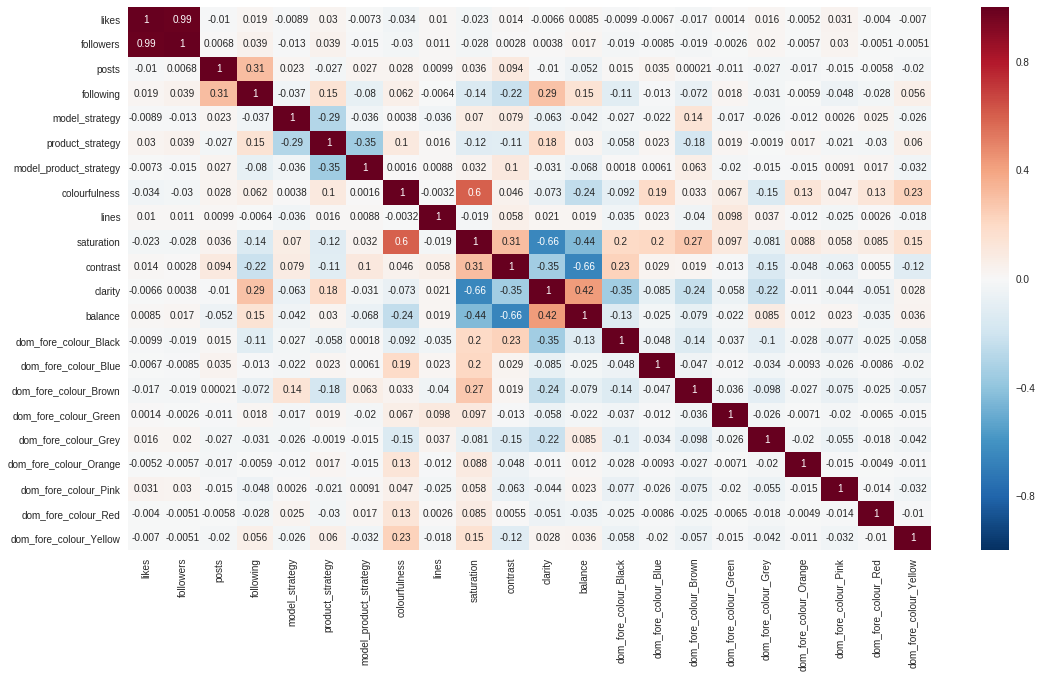

In [12]:
fig, ax = plt.subplots(figsize=(18,10))

ax = sns.heatmap( Corr,annot=True)

_______________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>The boxplot</font> 
**Boxplots (or box plots) displays variation in samples, and <font color='green'>outliers</font>  may be plotted as individual points.**

**The next code displays the boxplot of the <font color='blue'>likes</font> viriable.**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


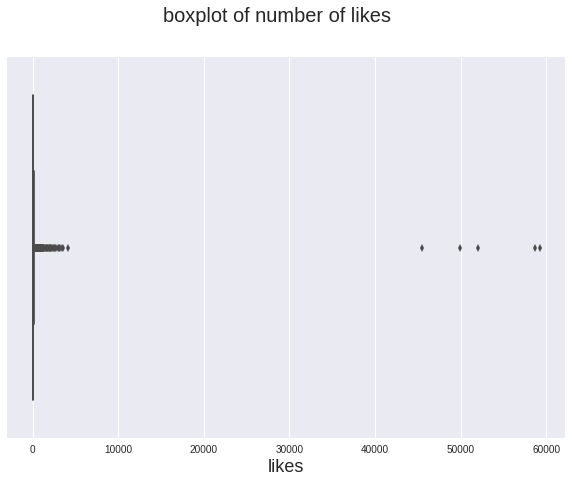

In [13]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x= Data3['likes'])

fig.suptitle('boxplot of number of likes', fontsize=20)
plt.xlabel("likes",fontsize=18)

plt.show()

_______________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>Regression analysis</font> 

**The first step is to divide the dataset into <font color='blue'>x (independent variables)</font>  and <font color='blue'>y (dependant variable)</font>.**

In [0]:
y = Data3['likes']

x = Data3.drop(['likes'], axis=1).astype(float)


**Now we can perfrom the <font color='green'>regression analysis</font>. **

**It is worthy to mention that the “strategy” categorial variables have the following coding:**

![alt text](https://i.ibb.co/DRn2V6M/coding-1.png)

In [15]:
x = sm.add_constant(x)
model= sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     4232.
Date:                Wed, 27 Feb 2019   Prob (F-statistic):               0.00
Time:                        05:19:58   Log-Likelihood:                -18100.
No. Observations:                2447   AIC:                         3.624e+04
Df Residuals:                    2425   BIC:                         3.637e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     39



**Even significance level 𝛼=0.1, no  X variable, except control variables, is significant.
What is wrong???**
_______________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>More cleaning</font> 

**In the above bobplot, we can see some samples with very high number of likes. This may be due to unobserved “event”. For example, sometimes, company do new product launching event by spending lots of advertising cost. We don’t have X variables to capture such events. 
Then, one might exclude these “outliers”. **
**The following line of code removes the samples (row of data) with number of <font color='blue'>likes</font> greater than 10,000 and saves the remaining data in a new variable <font color='blue'>Data4</font>.**
 

In [0]:
Data4= Data3[Data3['likes']<10000]

**Let us plot the boxplot after removing the outliers:**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


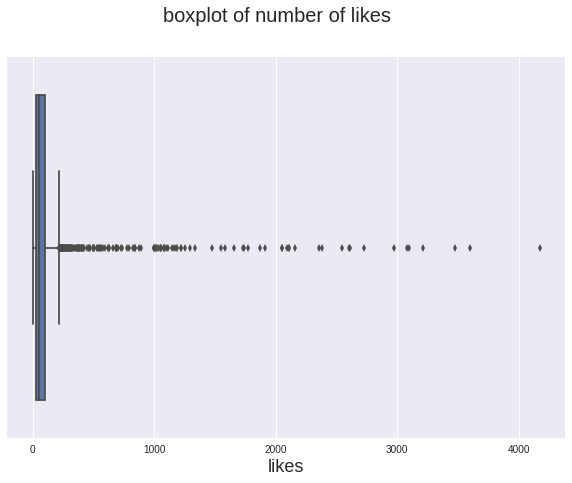

In [18]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x= Data4['likes'])

fig.suptitle('boxplot of number of likes', fontsize=20)
plt.xlabel("likes",fontsize=18)

plt.show()


_______________________________________________________________________________________________________________________________________________________________________________________________________________

##<font color='orange'>Scatter plots and Regression Lines</font> 

**The scatter plot is used to visually identify relationships between the first and the second entries of paired data. If data is given in pairs then the scatter diagram of the data is just the points plotted on the xy-plane. Linear regression consists of finding the best-fitting straight line through the points. The best-fitting line is called a regression line. The blue  diagonal line in plot below is the regression line and consists of the predicted score on Y ( number of likes) for each possible value of X (number of followers)**
**The next code plots the scatter plot for <font color='blue'>likes</font> vs <font color='blue'>followers</font>.**


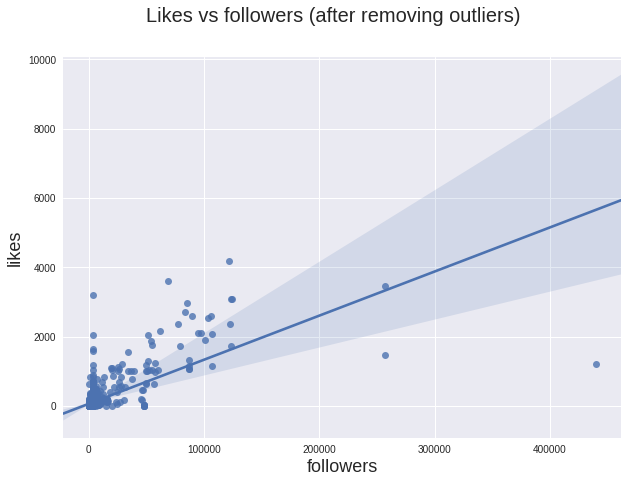

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(Data4['followers'],Data4['likes'])
fig.suptitle('Likes vs followers (after removing outliers)', fontsize=20)

plt.xlabel("followers",fontsize=18)
plt.ylabel("likes", fontsize=18)
plt.show()

_______________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>Let's do the regression analysis</font> 

**The first step is to divide the dataset into <font color='blue'>x2 (independent variables)</font>  and <font color='blue'>y2 (dependant variable)</font>, but this time using the clean dataset <font color='blue'>Data4</font>. **

In [0]:
y2 = Data4['likes']
x2 = Data4.drop(['likes'], axis=1).astype(float)

**Now we can perfrom the <font color='green'>regression analysis</font>. **

In [21]:
x2 = sm.add_constant(x2)
model = sm.OLS(y2, x2).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     127.4
Date:                Wed, 27 Feb 2019   Prob (F-statistic):               0.00
Time:                        05:20:30   Log-Likelihood:                -16432.
No. Observations:                2442   AIC:                         3.291e+04
Df Residuals:                    2420   BIC:                         3.303e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11

**<font color='blue'>model_strategy</font> and <font color='blue'>product_strategy</font> are not significantly different from baseline pictures. **

**<font color='blue'>dom_fore_colour_Black</font>  and <font color='blue'>dom_fore_colour_Green</font> are significantly different from baseline colour white.**



_______________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>What if not including control X variables?</font> 

**The following line of code removes the control variables <font color='blue'>followers</font>, <font color='blue'>posts</font>, and <font color='blue'>following</font> from <font color='blue'>x2</font> and saves the remaining data in a new variable <font color='blue'>x3</font>.**


In [0]:
x3 = x2.drop(['followers','posts','following'], axis=1).astype(float)

**Now we can perfrom the <font color='green'>regression analysis</font>. **


In [23]:
model = sm.OLS(y2, x3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.238
Date:                Wed, 27 Feb 2019   Prob (F-statistic):            0.00203
Time:                        05:20:39   Log-Likelihood:                -17320.
No. Observations:                2442   AIC:                         3.468e+04
Df Residuals:                    2423   BIC:                         3.479e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     22

**<font color='blue'>product_strategy</font> and <font color='blue'>clarity</font> also became significant.**